In [2]:
%matplotlib notebook



In [447]:
fp = open("in.csv", "r")
lines = fp.readlines()
fp.close()

In [448]:
import math

data = {}
target_scan = [10]
target_sensors = range(0,64)

for i in range(0,64):
    data[i] = 0
for ln in lines:
    if ln.startswith("-"):
        continue
    ln = ln.split(",")
    sensor = int(ln[1])
    scan = int(float(ln[0]))
    
    if len(ln[0]) < 5:
        continue
    if scan not in target_scan:
        continue
    if sensor not in target_sensors:
        continue
    x = float(ln[2])
    y = float(ln[3])
    z = float(ln[4].strip())
    
    dst = math.sqrt(x*x + y*y + z*z)
    data[sensor] = max([data[sensor], dst])

In [449]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D

xs = []
ys = []
zs = []

REMOVE_RIMS = True

errors = {
    0:0.005,
    1:0.005,
    2:0.005,
    3:0.005,
    4:0.005,
    5:0.005,
    6:0.005,
    7:0.005,
    8:0.005,
    9:0.005,
    10:0.005,
    11:0.005,
    12:0.005,
    13:0.005,
    14:0.005,
    15:0.005,
    16:0.005,
    17:0.005,
    18:0.005,
    19:0.005,
    20:0.005,
    21:0.005,
    22:0.005,
    23:0.005,
    24:0.005,
    25:0.005,
    26:0.005,
    27:0.005,
    28:0.005,
    29:0.005,
    30:0.005,
    31:0.005,
    32:0.005,
    33:0.005,
    34:0.1,
    35:0.1,
    36:0.1,
    37:0.1,
    38:0.1,
    39:0.1,
    40:0.1,
    41:0.1,
    42:0.1,
    43:0.1,
    44:0.1,
    45:0.1,
    46:0.1,
    47:0.1,
    48:0.1,
    49:0.1,
    50:0.1,
    51:0.1,
    52:0.1,
    53:0.1,
    54:0.1,
    55:0.1,
    56:0.1,
    57:0.1,
    58:0.1,
    59:0.1,
    60:0.1,
    61:0.1,
    62:0.1,
    63:0.1,
}

target_scan = [10]
target_sensors = range(0,64)

for ln in lines:
    if ln.startswith("-"):
        continue
    ln = ln.split(",")
    
    sensor = int(ln[1])
    scan = int(float(ln[0]))
    scan_mul = float("0." + (ln[0].strip().split(".")[1]) )
    if len(ln[0]) < 5:
        continue
    if scan not in target_scan:
        continue
    if sensor not in target_sensors:
        continue
    x = float(ln[2])
    y = float(ln[3])
    z = float(ln[4].strip())
    #if random.randint(0,10) < 7:
    #    continue
    
    if REMOVE_RIMS:
        dst = math.sqrt(x*x + y*y + z*z)
        if abs(dst - data[sensor]) < errors[sensor]:
            continue
        if abs(dst - 0) < errors[sensor]:
            continue
    
    xs.append(x)
    ys.append(y)
    zs.append(z)
    
    

In [450]:
print (max(xs))
print (min(xs))
print (max(ys))
print (min(ys))
print (max(zs))
print (min(zs))

3.538864
-13.994356
-0.246785
-2.947278
-11.670926
-119.555962


In [451]:
OUTPUT = True
if OUTPUT:
    fp = open("out.csv", "w")
    fp.write("x,y,z\n")
    sz = int(len(xs) / 4)
    for i in range(sz, sz*2):
        fp.write("{0},{1},{2}\n".format(xs[i], ys[i], zs[i]))
    fp.close()

In [452]:
OUTPUT_PCD = True
if OUTPUT_PCD:
    fp = open("pcd.pcd", "w")
    fp.write("VERSION .7\n")
    fp.write("FIELDS x y z\n")
    fp.write("SIZE 4 4 4\n")
    fp.write("TYPE F F F\n")
    fp.write("COUNT 1 1 1\n")
    fp.write("WIDTH {0}\n".format(len(xs)))
    fp.write("HEIGHT 1\n")
    fp.write("VIEWPOINT 0 0 0 1 0 0 0\n")
    fp.write("POINTS {0}\n".format(len(xs)))
    fp.write("DATA ascii\n")
    for i in range(len(xs)):
        fp.write("{0} {1} {2}\n".format(xs[i], ys[i], zs[i]))
    fp.close()

<IPython.core.display.Javascript object>


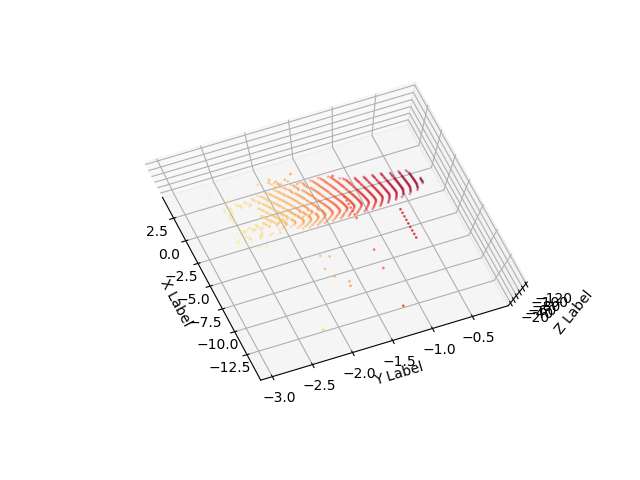

In [453]:

pd.set_option('max_columns',500)
pd.set_option('max_rows',500)

sz = len(xs)
sz = int(sz/4)
cmap = mpl.cm.get_cmap('YlOrRd')
normalize = mpl.colors.Normalize(vmin=min(ys), vmax=max(ys))
colors = [cmap(normalize(value)) for value in ys]

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.scatter(xs, ys, zs, color=colors, marker='o', s=1)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

DO = False
if DO:
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1, projection='3d')
    ax.scatter(xs[0:sz], ys[0:sz], zs[0:sz], c='r', marker='o', s=1)
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1, projection='3d')
    ax.scatter(xs[sz:sz*2], ys[sz:sz*2], zs[sz:sz*2], c='g', marker='o', s=1)
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')


    fig = plt.figure()
    ax = fig.add_subplot(1,1,1, projection='3d')
    ax.scatter(xs[sz*2:sz*3], ys[sz*2:sz*3], zs[sz*2:sz*3], c='b', marker='o', s=1)
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')


    fig = plt.figure()
    ax = fig.add_subplot(1,1,1, projection='3d')
    ax.scatter(xs[sz*3:sz*4], ys[sz*3:sz*4], zs[sz*3:sz*4], c='y', marker='o', s=1)
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')


plt.show()